In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### 예제
1. test_csv 폴더에 있는 '오프라인.csv' 로드 
2. 컬럼의 이름을 ['기준년월', '업종', '성별', '연령대', '총이용건수', '총이용금액'] 변경
3. 기준년월 컬럼의 데이터를 시계열 데이터로 변경
4. 성별 컬럼의 데이터를 1은 남자 2는 여자 9는 무관으로 변경
5. 남, 녀 성별을 기준으로 연도별 건당 이용금액의 평균이 몇인지 출력


In [ ]:
df = pd.read_csv("../../test_csv/오프라인.csv", encoding='cp949')

In [ ]:
df

In [ ]:
# 컬럼의 이름을 변경
df.columns = ['기준년월', '업종', '성별', 
              '연령대', '총이용건수', '총이용금액']
df.head(1)

In [ ]:
# 기준년월 데이터를 시계열 데이터로 변경 
df['기준년월'] = pd.to_datetime(df['기준년월'], format='%Y%m')

In [ ]:
df['연령대'].value_counts()

In [ ]:
# 성별 컬럼에서 1은 남자 2는 여자 9는 무관
df['성별'].value_counts()

In [ ]:
# 1. apply() + 일반함수
def change(x):
    # x가 1일때 
    if x == 1:
        result = '남자'
    elif x == 2:
        result = '여자'
    elif x == 9:
        result = '무관'
    else:
        result = '-'
    
    return result

df['성별'].apply(change)

In [ ]:
# 2. apply() + lambda를 사용
df['성별'].apply(
    lambda x : "남자" if (x == 1) else (
        "여자" if (x == 2) else (
            "무관" if (x == 9) else '-'
        )
    )
)

In [ ]:
# 3. replace 활용
# 스리즈에서 replace는 인덱스를 기준으로 데이터를 분할하여 체크
df['성별'].replace({
    1 : '남자', 
    2 : '여자', 
    9 : '무관'
})

In [ ]:
# 4. loc[]를 이용하여 데이터를 변경
df.loc[df['성별'] == 1, '성별'] = '남자'

In [ ]:
df['성별'].value_counts()

In [ ]:
df.loc[df['성별'] == 2, '성별'] = '여자'

In [ ]:
flag = df['총이용건수'].apply(lambda x : len(str(x))>=4)

In [ ]:
df.loc[flag]

In [ ]:
# 남, 녀 성별을 기준으로 연도별 건당 이용금액의 평균
df2 = pd.read_csv('../../test_csv/오프라인.csv', encoding='cp949')

In [ ]:
# 시계열에서 년도 부분만 따로 추출
df['기준년'] = df['기준년월'].dt.strftime('%Y')

In [ ]:
df.head(5)

In [ ]:
# 건당 이용금액 파생변수 생성
# 총이용금액 / 총이용건수
df['건당이용금액'] = df['총이용금액'] / df['총이용건수']

In [ ]:
group_data = \
    df[['성별', '기준년', '건당이용금액']].groupby(['성별', '기준년']).mean()

In [ ]:
import platform

In [ ]:
if platform.system() == 'Darwin':   # MAC인 경우
    plt.rc('font', family='AppleGothic')
else:                               # MAC이 아닌 경우
    plt.rc('font', family='Malgun Gothic')

In [ ]:
group_data.plot.bar()

In [ ]:
pivot_data = pd.pivot_table(
    df, 
    index = '기준년', 
    columns = '성별', 
    aggfunc = 'sum', 
    values = '총이용금액'
)

In [ ]:
pivot_data.plot.bar()

### 온라인 카드 매출과 오프라인 카드 매출을 월별로 비교
1. 오프라인 데이터 df를 월별로 그룹화 총 이용금액의 합계
2. 온라인 데이터 df_online도 월별로 그룹화 총 이용금액의 합계
3. 두개의 그룹화 데이터를 하나의 plot 그래프로 표시 

In [ ]:
# 판다스에서 지수표현식 변경
pd.options.display.float_format = '{:2f}'.format

In [ ]:
# 오프라인 데이터 df
df.head()

In [ ]:
# df의 기준년월을 기준으로 그룹화 하여 총이용금액의 합계
group_data_off = df[['기준년월', '총이용금액']].groupby('기준년월').sum()

In [ ]:
df_online = pd.read_csv("../../test_csv/온라인.csv")

In [ ]:
df_online.head(2)

In [ ]:
# 컬럼의 이름을 변경 
df_online.columns = ['기준년월', '성별', '연령대', '총이용건수', '총이용금액']
df_online.head(1)

In [ ]:
# 기준년월을 시계열 데이터 변경
df_online['기준년월'] = pd.to_datetime(df_online['기준년월'], format='%Y%m')

In [ ]:
df_online.info()

In [64]:
# 기준년월을 기준으로 하여 그룹화 하여 총이용금액의 합계
group_data_on = df_online[['기준년월', '총이용금액']].groupby('기준년월').sum()

In [70]:
from matplotlib.dates import MonthLocator

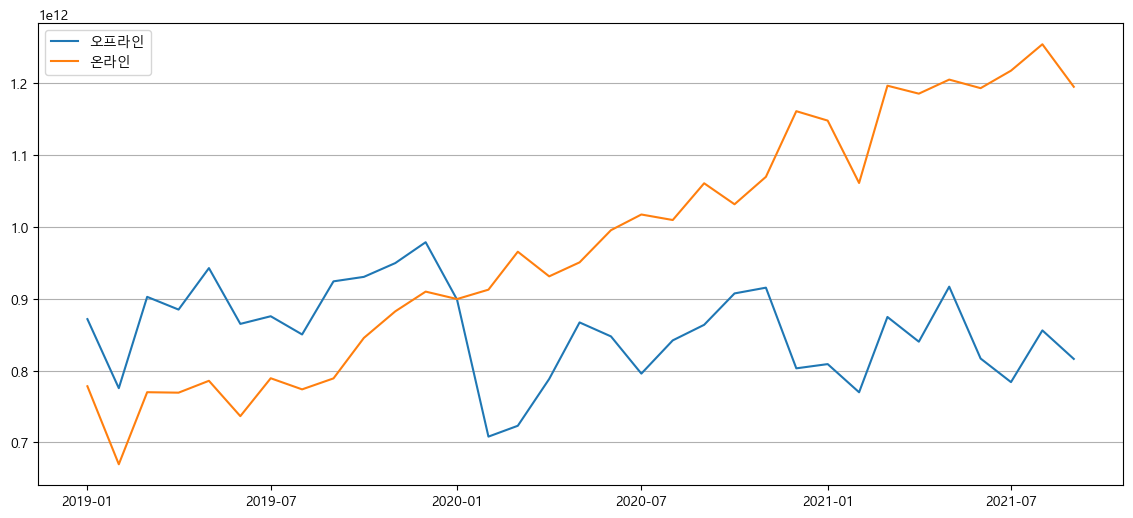

In [76]:
# 그래프로 시각화 

# 그래프 사이즈 변경 
plt.figure(figsize = (14, 6))
# grid 추가
plt.grid(True, axis = 'y')
plt.plot(group_data_off.index, group_data_off['총이용금액'], label = '오프라인')
plt.plot(group_data_on.index, group_data_on['총이용금액'], label = '온라인')
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(MonthLocator([1, 7]))

plt.show()

### 데이터프레임의 결합
1. df에는 업종 컬럼이 존재, df_online에는 업종 컬럼이 존재x
    - df_online에는 업종이라는 컬럼을 추가 데이터의 값들은 '온라인'
2. df와 df_online을 단순한 행 결합(유니언 결합)
3. 기준년월, 업종을 기준으로 하여 그룹화하여 총이용금액의 평균을 출력
4. plot 그래프 시각화

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준년월    2648 non-null   datetime64[ns]
 1   업종      2648 non-null   object        
 2   성별      2648 non-null   object        
 3   연령대     2648 non-null   int64         
 4   총이용건수   2648 non-null   int64         
 5   총이용금액   2648 non-null   float64       
 6   기준년     2648 non-null   object        
 7   건당이용금액  2648 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 165.6+ KB


In [78]:
df_online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   기준년월    651 non-null    datetime64[ns]
 1   성별      651 non-null    int64         
 2   연령대     651 non-null    int64         
 3   총이용건수   651 non-null    int64         
 4   총이용금액   651 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 25.6 KB


In [79]:
# df_online에 업종이라는 컬럼을 추가 -> '온라인'
df_online['업종'] = '온라인'

In [80]:
df_online.head(3)

,기준년월,성별,연령대,총이용건수,총이용금액,업종
0,2019-01-01,1,1,1,110685,온라인
1,2019-01-01,1,10,2333,98108225,온라인
2,2019-01-01,1,20,272915,13854081656,온라인


In [82]:
# df와 df_online 단순한 행 결합 
total_df = pd.concat([df, df_online], axis='rows')

In [84]:
pivot_data = pd.pivot_table(
    total_df, 
    index = '기준년월', 
    columns = '업종', 
    values = '총이용금액', 
    aggfunc = 'mean'
)

In [91]:
pivot_data.head(2)

업종,백화점,슈퍼마켓,온라인,편의점,할인점
기준년월,,,,,
2019-01-01,21709311385.095238,8267289956.571428,38914082948.300003,2204179231.050000,9908589002.049999
2019-02-01,21115348496.894737,8138897345.315789,37201531105.555557,2115622153.052632,9976132589.055555


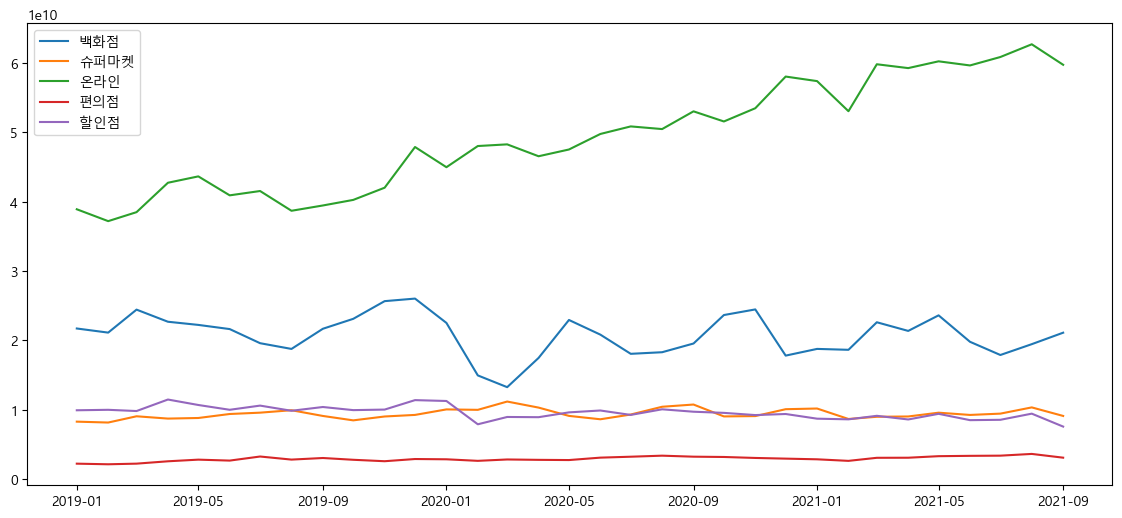

In [93]:
plt.figure(figsize = (14, 6))

for col in pivot_data.columns:
    plt.plot(pivot_data[col], label=col)

plt.legend()

plt.show()